In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=100,shuffle=True,random_state=18,n_features=5)
X.shape,y.shape

((100, 5), (100,))

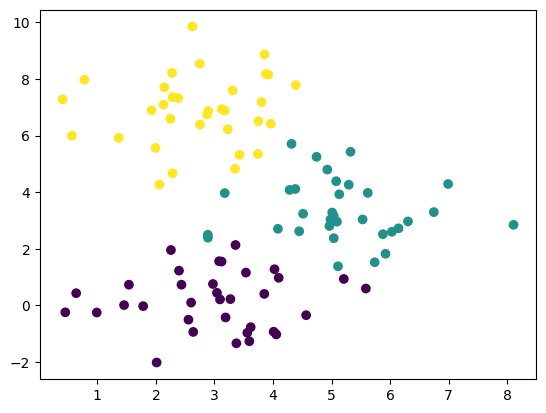

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

**We know that there are three clusters , now we demonstate practically**

In [ ]:
df=pd.DataFrame(X)
df.head()

,0,1,2,3,4
0,-1.719504,-1.248688,0.445166,0.008079,1.513075
1,-1.949709,-1.017418,-0.096769,0.532010,1.377525
2,-0.564029,0.998425,-1.459327,-0.896988,-0.468281
3,-1.049217,-1.845882,-0.053873,-0.222085,1.322390
4,0.740457,0.612560,1.434895,0.971642,-0.683035


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init="k-means++",random_state=18)
  kmean.fit(X)
  wcss.append(kmean.inertia_)



In [ ]:
wcss

[500.0000000000001,
 263.19780036406473,
 105.8981464592892,
 93.48088339095175,
 83.5472666898464,
 75.5113468930595,
 69.54679745490827,
 64.06764593883535,
 62.85320643218123,
 56.65124405455772]

**Finding K-value**

elbow

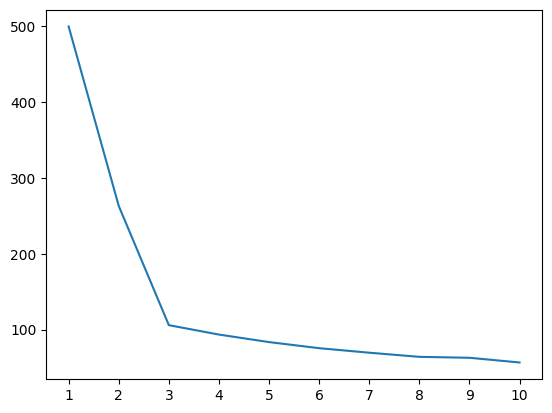

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()


knee locator

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
nee=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print(nee.elbow)

3


silhotte scoring

In [ ]:
from sklearn.metrics import silhouette_score
SHScore=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k,init="k-means++",random_state=18)
  kmean.fit(X)
  sil=silhouette_score(X,kmean.labels_)
  SHScore.append(sil)


In [ ]:
SHScore

[0.4664311133455035,
 0.5985615071728775,
 0.49245287130315907,
 0.36590870242452644,
 0.26760456870163263,
 0.24999443888734266,
 0.2327221744088324,
 0.21204029653596307,
 0.22375056168473148]

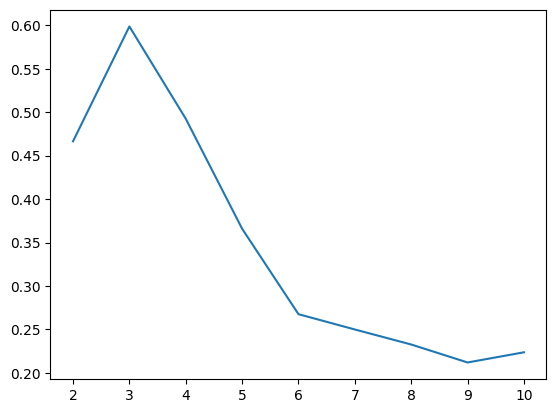

In [ ]:
plt.plot(range(2,11),SHScore)
plt.xticks(range(2,11))
plt.show()

# **K=3**

In [ ]:
kmean=KMeans(n_clusters=3,random_state=3)
y=kmean.fit_predict(X)
y

array([1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2,
       2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0], dtype=int32)

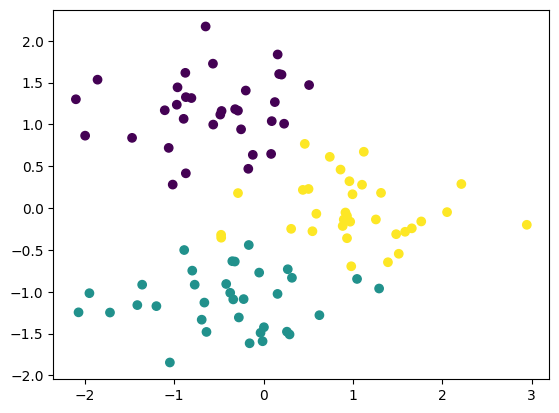

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()